In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
ds=pd.read_csv('rainfall_prediction.csv')
df=pd.DataFrame(data=ds)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [80]:
df.dtypes.sort_values(ascending=True)

WindSpeed9am     float64
Temp3pm          float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
Temp9am          float64
WindGustSpeed    float64
Cloud3pm         float64
Cloud9am         float64
Pressure3pm      float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Date              object
WindDir3pm        object
WindDir9am        object
WindGustDir       object
Location          object
RainToday         object
RainTomorrow      object
dtype: object

In [81]:
df.isnull().sum().sort_values(ascending=True)

Date                0
Location            0
Temp9am            56
Humidity9am        59
MaxTemp            60
MinTemp            75
WindSpeed9am       76
Temp3pm            96
Humidity3pm       102
WindSpeed3pm      107
RainTomorrow      239
RainToday         240
Rainfall          240
WindDir3pm        308
WindDir9am        829
WindGustDir       991
WindGustSpeed     991
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Evaporation      3512
Sunshine         3994
dtype: int64

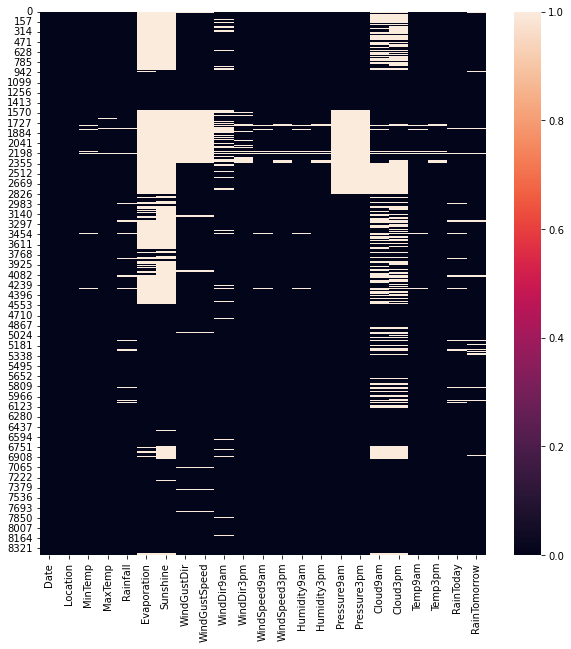

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

The above indicates the existence of null values in the dataset

In [83]:
#Filling the null values

In [84]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')

In [85]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=si.fit_transform(df[i].values.reshape(-1,1))


In [86]:
for i in df.columns:
    if df[i].dtypes=='float':
        df[i]=si.fit_transform(df[i].values.reshape(-1,1))


In [87]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [88]:
#Converting Strings in data into integers

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

In [90]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [91]:
df.dtypes.sort_values()

Date               int64
RainToday          int64
WindDir3pm         int64
WindDir9am         int64
WindGustDir        int64
RainTomorrow       int64
Location           int64
Sunshine         float64
Temp3pm          float64
Temp9am          float64
Cloud3pm         float64
Cloud9am         float64
Pressure3pm      float64
Pressure9am      float64
Humidity3pm      float64
Humidity9am      float64
WindSpeed3pm     float64
MinTemp          float64
MaxTemp          float64
WindGustSpeed    float64
Rainfall         float64
Evaporation      float64
WindSpeed9am     float64
dtype: object

Data type convertion is complete

In [92]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,4.0,0.0,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,4.0,0.0,14,44.0,6,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,4.0,0.0,15,46.0,13,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,4.0,0.0,4,24.0,9,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,4.0,0.0,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.4,0.0,4.0,0.0,0,31.0,9,...,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
8421,3000,9,3.6,25.3,0.0,4.0,0.0,6,22.0,9,...,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
8422,3001,9,5.4,26.9,0.0,4.0,0.0,3,37.0,9,...,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0
8423,3002,9,7.8,27.0,0.0,4.0,0.0,9,28.0,10,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,8425.0,1296.570564,854.249434,0.0,589.0,1088.0,2021.0,3003.0
Location,8425.0,5.793591,3.162654,0.0,3.0,6.0,8.0,11.0
MinTemp,8425.0,13.182682,5.380656,-2.0,9.3,13.2,17.3,28.5
MaxTemp,8425.0,23.825365,6.128159,8.2,19.2,23.2,28.0,45.5
Rainfall,8425.0,2.725982,10.319872,0.0,0.0,0.0,0.8,371.0
Evaporation,8425.0,4.810220,3.912448,0.0,4.0,4.0,5.2,145.0
Sunshine,8425.0,4.014042,4.744297,0.0,0.0,0.2,8.9,13.9
WindGustDir,8425.0,7.217804,4.702616,0.0,3.0,7.0,12.0,15.0
WindGustSpeed,8425.0,40.036320,13.781296,7.0,31.0,39.0,48.0,107.0
WindDir9am,8425.0,7.267418,4.588045,0.0,3.0,7.0,12.0,15.0


Key Observation:
1. There is a huge difference bewteen the 75th percentile and the maximum value for the following columns; Rainfall, Evaporation,WindGustSpeed, which suggest the presence of outliers
2. Some columns have significant difference between the mean and the 50th percentile suggesting skewness


In [94]:
df.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.475037,0.016096,0.099737,0.002532,0.112873,-0.261606,-0.084552,-0.044642,-0.012369,...,0.087271,-0.036512,-0.029275,0.067842,0.052334,0.050208,0.069157,0.108880,-0.011365,-0.011228
Location,0.475037,1.000000,0.116244,0.063727,0.005801,0.120376,-0.093480,-0.035408,0.230018,-0.027103,...,0.006195,0.056114,-0.044545,-0.009161,0.033864,0.008465,0.117040,0.059716,0.003071,0.002824
MinTemp,0.016096,0.116244,1.000000,0.716554,0.085226,0.267444,0.136892,-0.143821,0.230313,-0.040171,...,-0.131170,0.077566,-0.411773,-0.428689,0.016539,-0.038681,0.886777,0.687180,0.065191,0.092657
MaxTemp,0.099737,0.063727,0.716554,1.000000,-0.086542,0.328049,0.290243,-0.219104,0.139978,-0.210728,...,-0.391472,-0.422893,-0.315410,-0.402141,-0.242281,-0.242989,0.864741,0.973412,-0.222793,-0.150733
Rainfall,0.002532,0.005801,0.085226,-0.086542,1.000000,0.016758,-0.087678,0.037106,0.082628,0.093072,...,0.227291,0.234625,-0.069093,-0.030634,0.133553,0.101161,-0.007002,-0.089931,0.464941,0.219015
Evaporation,0.112873,0.120376,0.267444,0.328049,0.016758,1.000000,0.205342,-0.069158,0.155317,-0.049889,...,-0.250417,-0.175275,-0.159492,-0.199197,-0.105066,-0.133774,0.323197,0.318913,-0.090804,-0.060386
Sunshine,-0.261606,-0.093480,0.136892,0.290243,-0.087678,0.205342,1.000000,-0.055204,0.082179,-0.013584,...,-0.381333,-0.314459,0.056912,-0.086103,-0.574466,-0.545069,0.267029,0.288894,-0.144715,-0.197937
WindGustDir,-0.084552,-0.035408,-0.143821,-0.219104,0.037106,-0.069158,-0.055204,1.000000,0.025577,0.403562,...,0.034875,0.051377,-0.071336,-0.058467,0.164227,0.127633,-0.173622,-0.233015,0.125188,0.051832
WindGustSpeed,-0.044642,0.230018,0.230313,0.139978,0.082628,0.155317,0.082179,0.025577,1.000000,-0.068545,...,-0.271896,-0.093647,-0.382116,-0.385564,-0.004122,0.031616,0.202291,0.102218,0.076890,0.190274
WindDir9am,-0.012369,-0.027103,-0.040171,-0.210728,0.093072,-0.049889,-0.013584,0.403562,-0.068545,1.000000,...,0.023737,0.123157,0.010892,0.052802,0.098501,0.066539,-0.099944,-0.217929,0.157324,0.032860


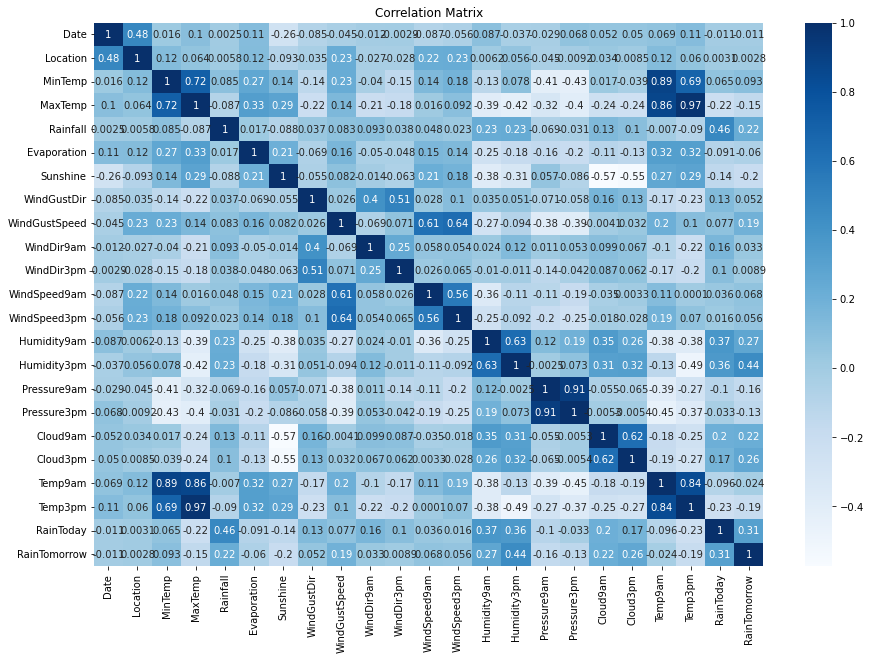

In [95]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix.jpg')
plt.show()

In [96]:
df.corr()['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.444347
RainToday        0.312929
Humidity9am      0.271396
Cloud3pm         0.261159
Rainfall         0.219015
Cloud9am         0.216294
WindGustSpeed    0.190274
MinTemp          0.092657
WindSpeed9am     0.067943
WindSpeed3pm     0.055508
WindGustDir      0.051832
WindDir9am       0.032860
WindDir3pm       0.008918
Location         0.002824
Date            -0.011228
Temp9am         -0.023597
Evaporation     -0.060386
Pressure3pm     -0.133191
MaxTemp         -0.150733
Pressure9am     -0.162406
Temp3pm         -0.192463
Sunshine        -0.197937
Name: RainTomorrow, dtype: float64

Key Observations:

1. The above shows the existence of about 44% correlation between humidity at 3pm and the target variable
2. There is an almost insignificant correlation between the target column and Location
3. The data also shows about 19% negative correlation between the target variables and sunshine

In [97]:
#checking skewness

In [98]:
df.skew()

Date              0.386560
Location         -0.050456
MinTemp          -0.084104
MaxTemp           0.391512
Rainfall         13.200523
Evaporation      13.812740
Sunshine          0.606448
WindGustDir       0.119640
WindGustSpeed     0.786153
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.969604
WindSpeed3pm      0.510765
Humidity9am      -0.262767
Humidity3pm       0.110858
Pressure9am       0.171566
Pressure3pm      -0.190150
Cloud9am         -0.863322
Cloud3pm         -0.804407
Temp9am          -0.005160
Temp3pm           0.412119
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

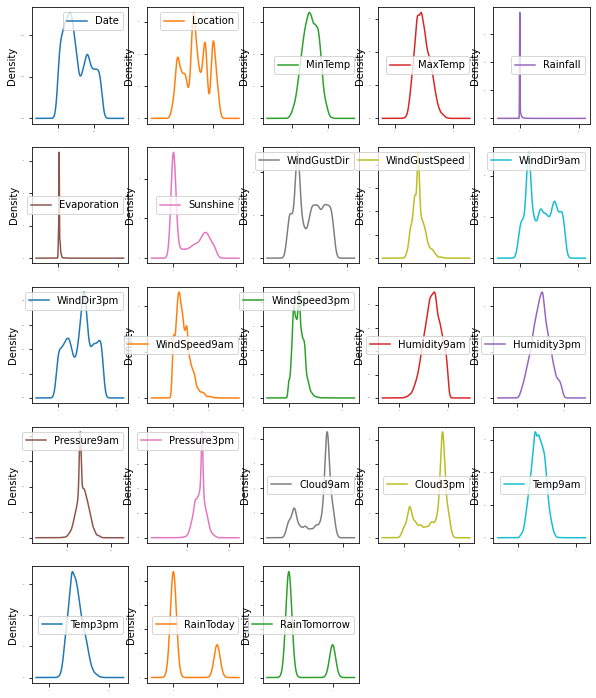

In [99]:
df.plot(kind='density',subplots=True,sharex=False,fontsize=1,figsize=(10,15),layout=(6,5))
plt.show()

This confirms the existence of skewness in the data

In [100]:
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [101]:
x.shape

(8425, 22)

In [102]:
y.shape

(8425,)

In [103]:
#Correcting skewness

In [104]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x_new

array([[-2.4632376 , -1.57286976,  0.04400111, ..., -0.1410323 ,
        -0.01719197, -0.55609919],
       [-2.43474226, -1.57286976, -1.07383317, ..., -0.0876171 ,
         0.39410716, -0.55609919],
       [-2.41266121, -1.57286976, -0.04877632, ...,  0.58495309,
         0.21664257, -0.55609919],
       ...,
       [ 1.65327865,  1.00253169, -1.44924777, ..., -0.93077971,
         0.67370603, -0.55609919],
       [ 1.65400073,  1.00253169, -0.9989538 , ..., -0.46261439,
         0.65850375, -0.55609919],
       [ 1.65472269,  1.00253169,  0.32199884, ..., -0.48053745,
        -0.17262214, -0.55609919]])

In [105]:
pd.DataFrame(x_new,columns=x.columns).skew().sort_values(ascending=True)

Cloud9am        -0.661473
Cloud3pm        -0.594300
WindDir3pm      -0.248689
WindGustDir     -0.187177
Location        -0.186657
Date            -0.166431
WindDir9am      -0.155025
MinTemp         -0.101517
WindSpeed9am    -0.077560
Humidity9am     -0.068790
Temp9am         -0.048325
Humidity3pm     -0.040070
WindSpeed3pm    -0.038813
Evaporation     -0.035207
MaxTemp         -0.010224
Temp3pm         -0.009349
Pressure9am      0.000000
Pressure3pm      0.008268
WindGustSpeed    0.010481
Sunshine         0.199202
Rainfall         1.028215
RainToday        1.242362
dtype: float64

Skewness in the data has been corrected

In [106]:
x=pd.DataFrame(x_new,columns=x.columns)
x

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-2.463238,-1.572870,0.044001,-0.067925,0.677035,-0.077668,-0.952201,1.160646,0.394268,1.179858,...,0.626292,0.151113,-1.647142,-2.864375e-14,-1.339405,1.171873,0.693386,-0.141032,-0.017192,-0.556099
1,-2.434742,-1.572870,-1.073833,0.288517,-0.659667,-0.077668,-0.952201,1.319872,0.394268,-0.140685,...,0.441339,-1.398100,-1.464629,-1.970646e-14,-1.235469,0.646259,0.693386,-0.087617,0.394107,-0.556099
2,-2.412661,-1.572870,-0.048776,0.382138,-0.659667,-0.077668,-0.952201,1.474872,0.529217,1.179858,...,0.806151,-1.708716,-1.167420,-2.897682e-14,-1.100892,0.646259,-1.333492,0.584953,0.216643,-0.556099
3,-2.393929,-1.572870,-0.737334,0.728233,-0.659667,-0.077668,-0.952201,-0.578373,-1.258863,0.473499,...,-0.946208,-1.344996,-2.023986,1.498801e-15,-0.474187,0.646259,0.693386,0.072335,0.734143,-0.556099
4,-2.377348,-1.572870,0.802785,1.327907,1.038925,-0.077668,-0.952201,1.160646,0.183934,-1.528740,...,0.250685,0.842105,-0.992701,-1.909584e-14,-1.501445,0.646259,1.234309,0.019066,1.197715,-0.556099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.651834,1.002532,-1.940585,0.014996,-0.659667,-0.077668,-0.952201,-1.843336,-0.601802,0.473499,...,-0.703317,-1.018871,-1.525086,2.192690e-14,0.732007,0.646259,0.693386,-1.367461,0.084165,-0.556099
8421,1.652556,1.002532,-1.788910,0.319886,-0.659667,-0.077668,-0.952201,-0.122677,-1.469455,0.473499,...,-0.946208,-0.737800,-1.708778,1.876277e-14,0.533680,0.646259,0.693386,-1.221361,0.425817,-0.556099
8422,1.653279,1.002532,-1.449248,0.565147,-0.659667,-0.077668,-0.952201,-0.833869,-0.113140,0.473499,...,-0.946208,-0.907422,-1.525086,1.149081e-14,0.159294,0.646259,0.693386,-0.930780,0.673706,-0.556099
8423,1.654001,1.002532,-0.998954,0.580153,-0.659667,-0.077668,-0.952201,0.471492,-0.869984,0.659979,...,-1.206785,-1.018871,-1.525086,6.772360e-15,0.111012,-1.028791,-1.333492,-0.462614,0.658504,-0.556099


In [107]:
#Checking for outliers

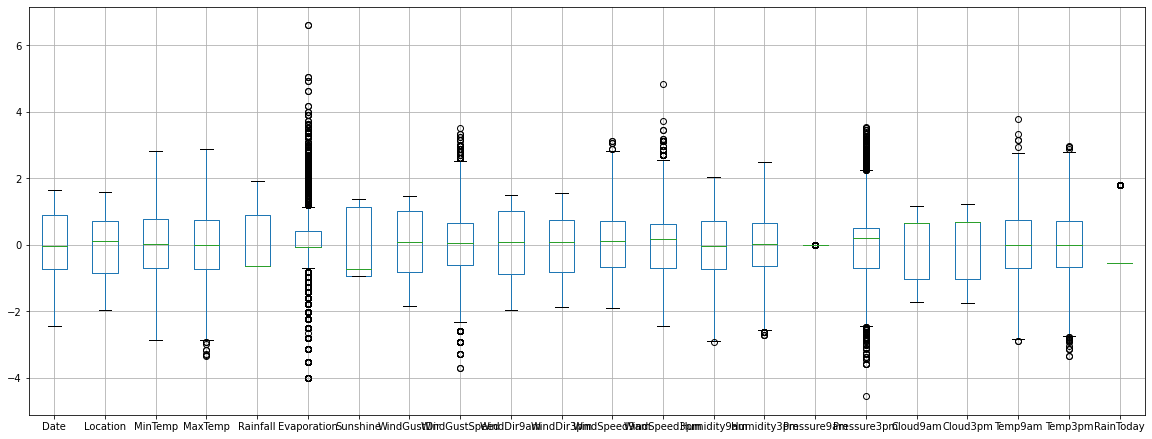

In [108]:
x.boxplot(figsize=[20,9])
plt.subplots_adjust(bottom=0.25)
plt.show()

The above confirms the existence of outliers

In [109]:
from scipy.stats import zscore
zscore(df)
z=np.abs(zscore(df))
z

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.517879,1.515776,0.040391,0.151011,0.206021,0.2071,0.846127,1.229643,0.287630,1.249535,...,0.187215,1.599484,1.493738,1.357790,1.025166,0.690047,0.150064,0.101753,0.556099,0.556282
1,1.516709,1.515776,1.074781,0.208009,0.264165,0.2071,0.846127,1.442303,0.287630,0.276260,...,1.421959,1.435688,1.037704,1.246435,0.650214,0.690047,0.096617,0.318031,0.556099,0.556282
2,1.515538,1.515776,0.052540,0.305923,0.264165,0.2071,0.846127,1.654964,0.432763,1.249535,...,1.779553,1.162693,1.509464,1.103264,0.650214,1.260055,0.580367,0.133326,0.556099,0.556282
3,1.514367,1.515776,0.740229,0.681262,0.264165,0.2071,0.846127,0.684299,1.163698,0.377652,...,1.362360,1.927077,0.063067,0.451043,0.650214,0.690047,0.063721,0.687441,0.556099,0.556282
4,1.513197,1.515776,0.802425,1.382983,0.167258,0.2071,0.846127,1.229643,0.069931,1.366114,...,0.842805,0.998897,1.006254,1.532776,0.650214,1.080067,0.010275,1.224763,0.556099,0.556282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.993013,1.013895,1.929746,0.069416,0.264165,0.2071,0.846127,1.534940,0.655733,0.377652,...,1.004766,1.490286,1.163839,0.742046,0.650214,0.690047,1.361509,0.001004,0.556099,0.556282
8421,1.994184,1.013895,1.781056,0.240647,0.264165,0.2071,0.846127,0.258979,1.308831,0.377652,...,0.706770,1.654083,0.990861,0.551152,0.650214,0.690047,1.218986,0.351614,0.556099,0.556282
8422,1.995355,1.013895,1.446505,0.501752,0.264165,0.2071,0.846127,0.896959,0.220335,0.377652,...,0.885568,1.490286,0.597728,0.185271,0.650214,0.690047,0.933940,0.620275,0.556099,0.556282
8423,1.996525,1.013895,1.000436,0.518071,0.264165,0.2071,0.846127,0.379002,0.873433,0.595623,...,1.004766,1.490286,0.346123,0.137548,0.849595,1.260055,0.470740,0.603484,0.556099,0.556282


In [110]:
#removing outliers in the data

In [111]:
df_new=df[(z<3).all(axis=1)]
df_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,4.0,0.0,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,4.0,0.0,14,44.0,6,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,4.0,0.0,15,46.0,13,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,4.0,0.0,4,24.0,9,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,4.0,0.0,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.4,0.0,4.0,0.0,0,31.0,9,...,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
8421,3000,9,3.6,25.3,0.0,4.0,0.0,6,22.0,9,...,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
8422,3001,9,5.4,26.9,0.0,4.0,0.0,3,37.0,9,...,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0
8423,3002,9,7.8,27.0,0.0,4.0,0.0,9,28.0,10,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [112]:
print('New data:', df_new.shape)
print('Old data:', df.shape)
print('Total outliers removed:', df.shape[0]-df_new.shape[0])

New data: (7986, 23)
Old data: (8425, 23)
Total outliers removed: 439


In [113]:
x=df_new.drop(['RainTomorrow'],axis=1)
y=df_new['RainTomorrow']

In [114]:
#Scaling the x data

In [115]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [116]:
for col in x:
    mms=MinMaxScaler()
    x[col]=mms.fit_transform(x[[col]])
x

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.000000,0.090909,0.508251,0.434911,0.017964,0.246914,0.0,0.866667,0.500000,0.866667,...,0.521739,0.646341,0.172043,0.234501,0.274194,1.000,0.875,0.460123,0.442073,0.0
1,0.000333,0.090909,0.310231,0.500000,0.000000,0.246914,0.0,0.933333,0.500000,0.400000,...,0.478261,0.317073,0.204301,0.312668,0.293011,0.875,0.875,0.469325,0.518293,0.0
2,0.000666,0.090909,0.491749,0.517751,0.000000,0.246914,0.0,1.000000,0.527027,0.866667,...,0.565217,0.243902,0.258065,0.231806,0.317204,0.875,0.250,0.585890,0.484756,0.0
3,0.000999,0.090909,0.369637,0.585799,0.000000,0.246914,0.0,0.266667,0.229730,0.600000,...,0.195652,0.329268,0.107527,0.501348,0.427419,0.875,0.875,0.496933,0.585366,0.0
4,0.001332,0.090909,0.643564,0.713018,0.029940,0.246914,0.0,0.866667,0.459459,0.066667,...,0.434783,0.780488,0.290323,0.318059,0.244624,0.875,1.000,0.487730,0.682927,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,0.998668,0.818182,0.158416,0.449704,0.000000,0.246914,0.0,0.000000,0.324324,0.600000,...,0.239130,0.402439,0.193548,0.690027,0.629032,0.875,0.875,0.251534,0.460366,0.0
8421,0.999001,0.818182,0.184818,0.505917,0.000000,0.246914,0.0,0.400000,0.202703,0.600000,...,0.195652,0.463415,0.161290,0.660377,0.596774,0.875,0.875,0.276074,0.524390,0.0
8422,0.999334,0.818182,0.244224,0.553254,0.000000,0.246914,0.0,0.200000,0.405405,0.600000,...,0.195652,0.426829,0.193548,0.592992,0.534946,0.875,0.875,0.325153,0.573171,0.0
8423,0.999667,0.818182,0.323432,0.556213,0.000000,0.246914,0.0,0.600000,0.283784,0.666667,...,0.152174,0.402439,0.193548,0.549865,0.526882,0.375,0.250,0.404908,0.570122,0.0


In [117]:
#Checking Inbalance

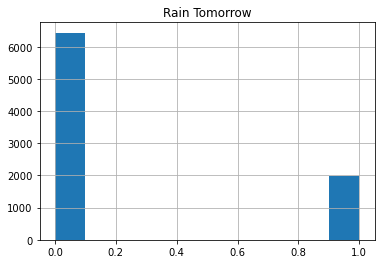

0    6434
1    1991
Name: RainTomorrow, dtype: int64

In [118]:
df['RainTomorrow'].hist()
plt.title('Rain Tomorrow')
plt.show()

df['RainTomorrow'].value_counts()

In [119]:
#correcting the inbalance

In [120]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

import warnings
warnings.filterwarnings('ignore')

In [121]:
x,y=sm.fit_resample(x,y)

x.value_counts()

Date      Location  MinTemp   MaxTemp   Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am   Temp3pm   RainToday
0.124542  0.454545  0.570957  0.479290  0.000000  0.456790     0.330935  0.866667     0.756757       0.466667    0.800000    0.454545      0.934783      0.256098     0.752688     0.223720     0.223118     0.875000  0.875000  0.552147  0.362805  0.0          6
0.198468  0.454545  0.171617  0.156805  0.000000  0.074074     0.093525  0.200000     0.324324       0.200000    0.400000    0.545455      0.239130      0.670732     0.903226     0.668464     0.712366     0.875000  0.875000  0.125767  0.103659  0.0          6
0.002997  1.000000  0.653465  0.355030  0.000000  0.246914     0.000000  0.733333     0.702703       0.666667    0.666667    1.000000      0.804348      0.719512     0.795699     0.258760     0.373656     1.000000  0.875000  

In [122]:
y.value_counts()

0    6164
1    6164
Name: RainTomorrow, dtype: int64

In [123]:
#checking the corrected inbalance

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

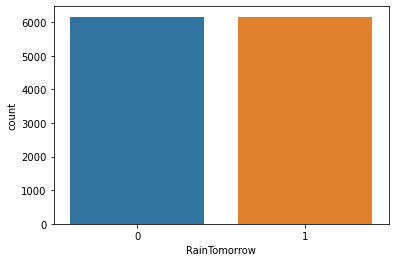

In [124]:
sns.countplot(y)

# Predicting Rainfall

In [125]:
#Training data

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression 

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
pred

array([1, 1, 1, ..., 0, 0, 1])

In [128]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7569613409029468
[[1435  413]
 [ 486 1365]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1848
           1       0.77      0.74      0.75      1851

    accuracy                           0.76      3699
   macro avg       0.76      0.76      0.76      3699
weighted avg       0.76      0.76      0.76      3699



In [129]:
#Model for predicting rainfall

In [130]:
def rainfallpredict(r):
    r=r.reshape(1,-1)    
    pred=lg.predict(r)
    print('Predicted value',pred)
    if pred==0:
        print("There will be no rainfall")
    else :
        print("There will be a rainfall")

# Predicting amount of Rainfall

In [131]:
x1=df_new.drop(['Rainfall'],axis=1)
y1=df_new['Rainfall']

In [132]:
#Scaling the x data

In [133]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [134]:
for col in x1:
    mms=MinMaxScaler()
    x1[col]=mms.fit_transform(x1[[col]])
x1

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.000000,0.090909,0.508251,0.434911,0.246914,0.0,0.866667,0.500000,0.866667,0.933333,...,0.646341,0.172043,0.234501,0.274194,1.000,0.875,0.460123,0.442073,0.0,0.0
1,0.000333,0.090909,0.310231,0.500000,0.246914,0.0,0.933333,0.500000,0.400000,1.000000,...,0.317073,0.204301,0.312668,0.293011,0.875,0.875,0.469325,0.518293,0.0,0.0
2,0.000666,0.090909,0.491749,0.517751,0.246914,0.0,1.000000,0.527027,0.866667,1.000000,...,0.243902,0.258065,0.231806,0.317204,0.875,0.250,0.585890,0.484756,0.0,0.0
3,0.000999,0.090909,0.369637,0.585799,0.246914,0.0,0.266667,0.229730,0.600000,0.000000,...,0.329268,0.107527,0.501348,0.427419,0.875,0.875,0.496933,0.585366,0.0,0.0
4,0.001332,0.090909,0.643564,0.713018,0.246914,0.0,0.866667,0.459459,0.066667,0.466667,...,0.780488,0.290323,0.318059,0.244624,0.875,1.000,0.487730,0.682927,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,0.998668,0.818182,0.158416,0.449704,0.246914,0.0,0.000000,0.324324,0.600000,0.066667,...,0.402439,0.193548,0.690027,0.629032,0.875,0.875,0.251534,0.460366,0.0,0.0
8421,0.999001,0.818182,0.184818,0.505917,0.246914,0.0,0.400000,0.202703,0.600000,0.200000,...,0.463415,0.161290,0.660377,0.596774,0.875,0.875,0.276074,0.524390,0.0,0.0
8422,0.999334,0.818182,0.244224,0.553254,0.246914,0.0,0.200000,0.405405,0.600000,0.933333,...,0.426829,0.193548,0.592992,0.534946,0.875,0.875,0.325153,0.573171,0.0,0.0
8423,0.999667,0.818182,0.323432,0.556213,0.246914,0.0,0.600000,0.283784,0.666667,0.200000,...,0.402439,0.193548,0.549865,0.526882,0.375,0.250,0.404908,0.570122,0.0,0.0


In [135]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score 
import warnings 
warnings.filterwarnings('ignore')

In [136]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=42)

In [137]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)
lr.coef_

array([-2.22368924e-01, -5.84949214e-02, -1.69786432e+00, -2.09646634e+00,
        6.70167940e-01,  2.09747987e-01, -5.14568021e-03,  8.39874281e-01,
        4.02624725e-01,  1.20751982e-01,  1.12193616e+00, -8.77177095e-02,
        2.20318442e+00,  5.67095751e-01, -1.80480320e+00,  2.05632261e+00,
        2.35469933e-01, -2.08557408e-02,  2.32283564e+00,  3.09629417e+00,
        7.55959463e+00,  4.48141666e-01])

In [138]:
lr.score(x1_test,y1_test)

0.4783434336173471

In [139]:
pred=lr.predict(x1_test)
pred

array([ 2.80264371e-01, -3.42989029e-01, -1.02262138e-03, ...,
       -6.09277828e-01,  8.23829250e+00, -1.21453410e-01])

In [140]:
print('mean absolute error:', mean_absolute_error(y1_test,pred))
print('mean squared error:',mean_squared_error(y1_test,pred))
print('root mean square:',np.sqrt(mean_squared_error(y1_test,pred)))

mean absolute error: 1.5177000777684344
mean squared error: 11.185728036243855
root mean square: 3.3445071439965344


In [141]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [142]:
knr=KNeighborsRegressor()
dtr=DecisionTreeRegressor()

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

model=[knr,dtr]

for m in model:
    m.fit(x1_train,y1_train)
    m.score(x1_train,y1_train)
    predm=m.predict(x1_test)
    print(predm)
    
m.score(x1_test,y1_test)


[0.04 0.08 0.   ... 0.   8.44 0.  ]
[0.2 0.  0.  ... 0.  1.6 0. ]


0.3719873755497317

In [143]:
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)

dtr.score(x1_train,y1_train)
preddtr=dtr.predict(x1_test)

print(preddtr)

dtr.score(x1_test,y1_test)

[0.2 0.  0.  ... 0.  1.4 0. ]


0.32909090579658085

In [144]:
knr=KNeighborsRegressor()
knr.fit(x1_train,y1_train)

knr.score(x1_train,y1_train)
predknr=knr.predict(x1_test)

print(predknr)

knr.score(x1_test,y1_test)

[0.04 0.08 0.   ... 0.   8.44 0.  ]


0.45125571817349863

In [145]:
#Regularization of the data

In [146]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score

rdg=Ridge(alpha=.0001,random_state=45)
rdg.fit(x1_train,y1_train)
rdg.score(x1_train,y1_train)

0.5052719971911731

The above indicates that 'rdg' has a higher accuracy score, thus could be chosen as the best for predicting test

In [147]:
def rainfallpredict(r):
    rdg=rdg.reshape(1,-1)   
    pred=rdg.predict(c)
    print('Predicted value',pred)
    if pred==0:
        print('There will be no rainfall')
    else :
        print("There will be rainfall")

In [148]:
#Saving the best model

In [149]:
import joblib   

joblib.dump(rdg,'rainfallpredictfile.obj')   
rdg_from_joblib=joblib.load('rainfallpredictfile.obj')   
rdg_from_joblib.predict(x_test) 

array([4.28111585, 2.18041164, 3.60133567, ..., 2.66002633, 7.87361839,
       3.85210989])